# 1 - Load Libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# 2 - Load Data

In [2]:
data=pd.read_csv('../input/ipba-12-unext-jigsaw-classification-case-study/train.csv',na_values=" ")

# 3 - Data Cleaning

## 3a - Find missing values and impute them

In [3]:
data.TotalCharges = data.TotalCharges.fillna(0)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3b - Set proper data type

In [4]:
data.SeniorCitizen = data.SeniorCitizen.astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   object 
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


## 3c - Find correlations between predictors

0.6547738214407784

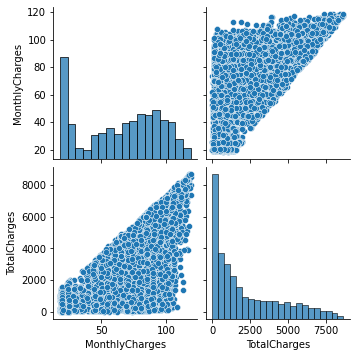

In [5]:
# High Correlation between Monthly Charges and Total charges, drop monthly charges from model
sns.pairplot(data[["MonthlyCharges","TotalCharges"]])
correlation = data['MonthlyCharges'].corr(data['TotalCharges'])
correlation

## 3d - Bin integer predictors

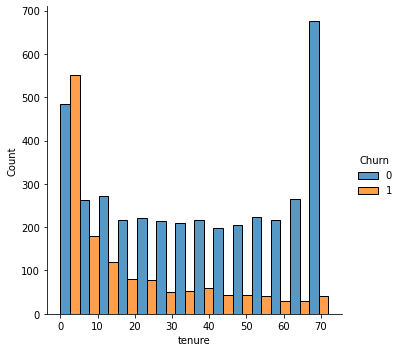

In [6]:
# Plot tenure to identify distribution against churn
sns.displot(data, x="tenure", hue="Churn", multiple="dodge")

In [7]:
# Binning tenure for effecient model
condition = [
    (data['tenure'] <= 20),
    (data['tenure'] > 20) & (data['tenure'] <= 40),
    (data['tenure'] > 40) & (data['tenure'] <= 60),
    (data['tenure'] > 60)
]

# Create list of categorical values related to these conditions
values = ['short','moderate','medium','long']

# Create a new column
data['tenure_bucket'] = np.select(condition,values)
data['tenure_bucket'].value_counts()

short       2168
long        1061
moderate    1050
medium      1003
Name: tenure_bucket, dtype: int64

# 4 - Prepare for train - test split

## Removing following variables from X - 
- 'customerID' - Not needed for prediction
- 'Churn' - To make target variable
- 'tenure' - Binned into relevant categories
- 'gender' - Not contributing to the classification
- 'Dependents' - Not contributing to the classification
- 'MonthlyCharges' - Dropped as high correlation with 'TotalCharges'

In [8]:
y = data['Churn']
X = data.drop(['customerID','Churn','tenure','gender','Dependents','MonthlyCharges'], axis = 1)

In [9]:
X=pd.get_dummies(X)
X.head()

,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_long,tenure_bucket_medium,tenure_bucket_moderate,tenure_bucket_short
0,3784.00,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,193.60,1,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1238.65,1,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,5124.60,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,723.40,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [11]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 400)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 5 - Initiate ML model

In [12]:
clf=GradientBoostingClassifier(max_depth=4,random_state=400)

In [13]:
#SMOTE
clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier(max_depth=4, random_state=400)

In [14]:
clf.score(X_test,y_test)

0.8098391674550615

# 6 - Grid search for optimum hyperparameter

# 7 - Feature importance

In [15]:
clf.feature_importances_

array([1.48517660e-01, 6.87161728e-03, 1.05091797e-02, 2.93212500e-02,
       1.78177195e-02, 6.69928244e-04, 4.19219323e-04, 8.31672144e-03,
       4.35529071e-04, 2.09557032e-03, 3.73301206e-02, 3.67169255e-03,
       4.41932134e-03, 1.10311201e-02, 3.86146680e-03, 3.29116675e-02,
       8.30918652e-03, 2.00233401e-02, 1.01408657e-02, 1.43783167e-03,
       5.68708782e-03, 5.51693191e-04, 9.07234898e-03, 9.49077387e-04,
       2.50880527e-02, 4.43363838e-03, 1.35324420e-02, 8.34056608e-04,
       5.78234251e-03, 1.28809414e-02, 6.43187562e-03, 2.33775862e-01,
       1.32650937e-01, 5.43510803e-02, 5.57661741e-02, 2.72312320e-02,
       1.19983645e-02, 1.53432602e-02, 8.78843754e-03, 8.32026672e-03,
       1.24878608e-03, 1.48003361e-04, 5.44005009e-04, 6.47902726e-03])

In [16]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

Contract_Month-to-month                    0.233776
TotalCharges                               0.148518
Contract_One year                          0.132651
PaperlessBilling_No                        0.055766
Contract_Two year                          0.054351
InternetService_DSL                        0.037330
OnlineSecurity_Yes                         0.032912
Partner_No                                 0.029321
PaperlessBilling_Yes                       0.027231
TechSupport_Yes                            0.025088
OnlineBackup_No internet service           0.020023
Partner_Yes                                0.017818
PaymentMethod_Credit card (automatic)      0.015343
StreamingTV_No internet service            0.013532
StreamingMovies_No internet service        0.012881
PaymentMethod_Bank transfer (automatic)    0.011998
OnlineSecurity_No                          0.011031
SeniorCitizen_1                            0.010509
OnlineBackup_Yes                           0.010141
TechSupport_

<AxesSubplot:>

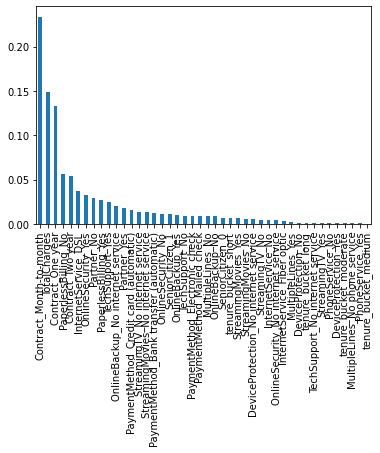

In [17]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

# 8 - Predict on train

In [18]:
y_train_predicted = clf.predict(X_train)
y_test_predicted = clf.predict(X_test)

In [19]:
# Check performance
from sklearn import metrics

print(classification_report(y_train, y_train_predicted))
print('AUC =',metrics.roc_auc_score(y_train, y_train_predicted))

print(classification_report(y_test, y_test_predicted))
print('AUC =',metrics.roc_auc_score(y_test, y_test_predicted))

# Results are perfect?

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3108
           1       0.69      0.67      0.68      1117

    accuracy                           0.83      4225
   macro avg       0.79      0.78      0.78      4225
weighted avg       0.83      0.83      0.83      4225

AUC = 0.7817366221573921
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       772
           1       0.66      0.61      0.64       285

    accuracy                           0.81      1057
   macro avg       0.76      0.75      0.75      1057
weighted avg       0.81      0.81      0.81      1057

AUC = 0.7480797200254523


# 9 - Load test data set and do data cleaning

In [20]:
test = pd.read_csv('../input/ipba-12-unext-jigsaw-classification-case-study/test.csv',na_values=" ")
test1 = test
test1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [21]:
test1.TotalCharges = test1.TotalCharges.fillna(0)
test1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [22]:
test1.SeniorCitizen = test1.SeniorCitizen.astype(object)
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   object 
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [23]:
# Create a list of conditions for bucketing
condition = [
    (test1['tenure'] <= 20),
    (test1['tenure'] > 20) & (test1['tenure'] <= 40),
    (test1['tenure'] > 40) & (test1['tenure'] <= 60),
    (test1['tenure'] > 60)
]

# Create list of categorical values related to these conditions
values = ['short','moderate','medium','long']

# Create a new column
test1['tenure_bucket'] = np.select(condition,values)
test1['tenure_bucket'].value_counts()

short       710
moderate    358
medium      347
long        346
Name: tenure_bucket, dtype: int64

# 10 - Prepare for prediction on test dataset

In [24]:
test1 = test1.drop(['customerID','tenure','gender','Dependents','MonthlyCharges'], axis = 1)
test1 = pd.get_dummies(test1)
test1.head()

,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_long,tenure_bucket_medium,tenure_bucket_moderate,tenure_bucket_short
0,4297.6,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,838.5,1,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,521.0,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,85.0,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2554.0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


# 11 - Predict on test dataset

In [25]:
test_predicted = clf.predict(test1)
len(test_predicted)

1761

# 12 - Create submission

In [26]:
test['Churn'] = test_predicted
submission = test[['customerID','Churn']]
submission.to_csv('submission.csv',index=False)